<h1 align=center>Sudoku Solver: Aplikasi Untuk Menyelesaikan Puzzles Menggunakan Algoritma Rekursif dan Iteratif</h1>
<h1 align=center><img src="https://github.com/user-attachments/assets/2d9bb1db-26fd-448e-bd25-84ced594be20" width="400px"></h1>
<h3 align=center>Disusun Oleh:</h3>
<h3 align=center>Fito Satrio (2311110030)</h3>
<h3 align=center>Egy Destiar Firmandani (2311110061)</h3>
<p><b>Deskripsi:</b></p>
<p> Algoritma ini menggunakan metode backtracking yang terkenal dalam penyelesaian Sudoku. Dimulai dari sel pertama, algoritma mencoba angka 1 hingga 9, mengecek apakah angka tersebut valid (tidak melanggar aturan baris, kolom, dan subgrid).

Jika angka valid, algoritma melanjutkan ke sel berikutnya. Jika tidak, algoritma kembali (backtrack) ke sel sebelumnya, mencoba angka berikutnya, dan melanjutkan proses hingga puzzle selesai.

Metode ini sangat cocok untuk menyelesaikan Sudoku dengan kompleksitas tinggi karena menjelajahi semua kemungkinan solusi secara mendalam dan memastikan tidak ada aturan yang dilanggar.  </p>


### Recursive

In [27]:
import random
import time


steps = 0

def is_valid(board, row, col, num):
    if num in board[row]:
        return False
    if num in [board[i][col] for i in range(9)]:
        return False
    start_row, start_col = 3 * (row // 3), 3 * (col // 3)
    for i in range(start_row, start_row + 3):
        for j in range(start_col, start_col + 3):
            if board[i][j] == num:
                return False
    return True


def solve_sudoku(board):
    global steps
    for row in range(9):
        for col in range(9):
            if board[row][col] == 0:
                for num in range(1, 10):
                    steps += 1  
                    if is_valid(board, row, col, num):
                        board[row][col] = num
                        if solve_sudoku(board):
                            return True
                        board[row][col] = 0
                return False
    return True


def generate_sudoku(level):
    board = [[0 for _ in range(9)] for _ in range(9)]
    for i in range(0, 9, 3):
        fill_subgrid(board, i, i)
    solve_sudoku(board)

    if level == "easy":
        remove_numbers(board, random.randint(30, 35))
    elif level == "medium":
        remove_numbers(board, random.randint(36, 45))
    elif level == "hard":
        remove_numbers(board, random.randint(46, 55))
    elif level == "expert":
        remove_numbers(board, random.randint(56, 60))
    elif level == "extreme":
        remove_numbers(board, random.randint(61, 64))
    return board


def fill_subgrid(board, row, col):
    nums = random.sample(range(1, 10), 9)
    for i in range(3):
        for j in range(3):
            board[row + i][col + j] = nums.pop()


def remove_numbers(board, count):
    while count > 0:
        row, col = random.randint(0, 8), random.randint(0, 8)
        if board[row][col] != 0:
            board[row][col] = 0
            count -= 1


def print_board(board):
    for i, row in enumerate(board):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j, num in enumerate(row):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            print(str(num) if num != 0 else ".", end=" ")
        print()


In [28]:
if __name__ == "__main__":
    level = "easy"

    start_generate = time.time()
    sudoku = generate_sudoku(level)
    end_generate = time.time()
    print(f"\nGenerated Sudoku Puzzle ({level.capitalize()}):")
    print_board(sudoku)
    print(f"\nTime to generate Sudoku: {end_generate - start_generate:.6f} seconds")

    global steps
    steps = 0 
    start_solve = time.time()
    solve_sudoku(sudoku)
    end_solve = time.time()

    time_easy = end_solve - start_solve

    print("\nSolved Sudoku:")
    print_board(sudoku)
    print(f"\nTime to solve Sudoku: {time_easy:.6f} seconds")
    print(f"Steps taken to solve Sudoku: {steps}")



Generated Sudoku Puzzle (Easy):
. 3 6 | 1 4 . | 8 9 7 
5 8 . | 2 . . | 1 . 3 
. . 1 | . . 6 | 2 5 . 
---------------------
1 . 3 | 9 6 7 | 5 4 . 
4 6 . | 5 . 2 | 9 7 1 
7 . . | . . . | 3 2 . 
---------------------
. 1 5 | . 2 4 | . 3 9 
3 . . | . 9 . | 7 . 5 
6 . . | . 5 3 | 4 . . 

Time to generate Sudoku: 0.001999 seconds

Solved Sudoku:
2 3 6 | 1 4 5 | 8 9 7 
5 8 4 | 2 7 9 | 1 6 3 
9 7 1 | 3 8 6 | 2 5 4 
---------------------
1 2 3 | 9 6 7 | 5 4 8 
4 6 8 | 5 3 2 | 9 7 1 
7 5 9 | 4 1 8 | 3 2 6 
---------------------
8 1 5 | 7 2 4 | 6 3 9 
3 4 2 | 6 9 1 | 7 8 5 
6 9 7 | 8 5 3 | 4 1 2 

Time to solve Sudoku: 0.000000 seconds
Steps taken to solve Sudoku: 196


In [29]:
if __name__ == "__main__":
    level = "medium" 
    
    start_generate = time.time()
    sudoku = generate_sudoku(level)
    end_generate = time.time()
    print(f"\nGenerated Sudoku Puzzle ({level.capitalize()}):")
    print_board(sudoku)
    print(f"\nTime to generate Sudoku: {end_generate - start_generate:.6f} seconds")

    global steps
    steps = 0 
    start_solve = time.time()
    solve_sudoku(sudoku)
    end_solve = time.time()

    time_medium = end_solve - start_solve

    print("\nSolved Sudoku:")
    print_board(sudoku)
    print(f"\nTime to solve Sudoku: {time_medium:.6f} seconds")
    print(f"Steps taken to solve Sudoku: {steps}")


Generated Sudoku Puzzle (Medium):
6 5 8 | 1 2 . | . . . 
. 4 1 | . 7 9 | . . . 
3 9 7 | 6 . . | 1 5 2 
---------------------
. 7 2 | 4 5 6 | 9 . . 
. . 9 | 7 . 2 | . 1 . 
8 6 4 | 3 . 1 | . . . 
---------------------
9 8 3 | . 6 . | 7 . 1 
4 1 6 | . . 7 | . . 5 
. . . | 9 1 . | . . 3 

Time to generate Sudoku: 0.005996 seconds

Solved Sudoku:
6 5 8 | 1 2 3 | 4 7 9 
2 4 1 | 5 7 9 | 3 8 6 
3 9 7 | 6 4 8 | 1 5 2 
---------------------
1 7 2 | 4 5 6 | 9 3 8 
5 3 9 | 7 8 2 | 6 1 4 
8 6 4 | 3 9 1 | 5 2 7 
---------------------
9 8 3 | 2 6 5 | 7 4 1 
4 1 6 | 8 3 7 | 2 9 5 
7 2 5 | 9 1 4 | 8 6 3 

Time to solve Sudoku: 0.000999 seconds
Steps taken to solve Sudoku: 311


In [35]:
if __name__ == "__main__":
    level = "hard" 

    start_generate = time.time()
    sudoku = generate_sudoku(level)
    end_generate = time.time()
    print(f"\nGenerated Sudoku Puzzle ({level.capitalize()}):")
    print_board(sudoku)
    print(f"\nTime to generate Sudoku: {end_generate - start_generate:.6f} seconds")

    global steps
    steps = 0 
    start_solve = time.time()
    solve_sudoku(sudoku)
    end_solve = time.time()

    time_hard = end_solve - start_solve

    print("\nSolved Sudoku:")
    print_board(sudoku)
    print(f"\nTime to solve Sudoku: {time_hard:.6f} seconds")
    print(f"Steps taken to solve Sudoku: {steps}")


Generated Sudoku Puzzle (Hard):
. 1 8 | 4 2 5 | . 6 9 
. . 5 | . . . | 3 . . 
. . 6 | . . . | . 1 . 
---------------------
. . . | 2 . . | . . 6 
. 6 2 | . . 8 | . 3 . 
. . . | . . . | . 4 2 
---------------------
1 5 . | . . . | . 2 . 
. . 9 | . 3 4 | . 5 . 
. 8 . | 1 5 2 | 9 . . 

Time to generate Sudoku: 0.000999 seconds

Solved Sudoku:
3 1 8 | 4 2 5 | 7 6 9 
2 7 5 | 6 1 9 | 3 8 4 
4 9 6 | 3 8 7 | 2 1 5 
---------------------
5 4 1 | 2 7 3 | 8 9 6 
9 6 2 | 5 4 8 | 1 3 7 
8 3 7 | 9 6 1 | 5 4 2 
---------------------
1 5 3 | 7 9 6 | 4 2 8 
7 2 9 | 8 3 4 | 6 5 1 
6 8 4 | 1 5 2 | 9 7 3 

Time to solve Sudoku: 0.003000 seconds
Steps taken to solve Sudoku: 1735


In [38]:
if __name__ == "__main__":
    level = "expert" 

    start_generate = time.time()
    sudoku = generate_sudoku(level)
    end_generate = time.time()
    print(f"\nGenerated Sudoku Puzzle ({level.capitalize()}):")
    print_board(sudoku)
    print(f"\nTime to generate Sudoku: {end_generate - start_generate:.6f} seconds")

    global steps
    steps = 0 
    start_solve = time.time()
    solve_sudoku(sudoku)
    end_solve = time.time()

    time_expert = end_solve - start_solve

    print("\nSolved Sudoku:")
    print_board(sudoku)
    print(f"\nTime to solve Sudoku: {time_expert:.6f} seconds")
    print(f"Steps taken to solve Sudoku: {steps}")


Generated Sudoku Puzzle (Expert):
. . . | 1 3 2 | . . . 
. . 1 | . . . | . . . 
6 . . | 8 . . | . . . 
---------------------
3 4 . | . 8 . | 5 . . 
. . . | . . . | . 4 . 
5 . 7 | . 2 9 | . . . 
---------------------
. 7 6 | 9 1 . | . 2 . 
. . . | . 7 . | . . . 
. . . | . . . | . . 8 

Time to generate Sudoku: 0.000999 seconds

Solved Sudoku:
4 5 8 | 1 3 2 | 6 7 9 
7 2 1 | 5 9 6 | 3 8 4 
6 9 3 | 8 4 7 | 1 5 2 
---------------------
3 4 2 | 6 8 1 | 5 9 7 
1 8 9 | 7 5 3 | 2 4 6 
5 6 7 | 4 2 9 | 8 3 1 
---------------------
8 7 6 | 9 1 5 | 4 2 3 
2 1 4 | 3 7 8 | 9 6 5 
9 3 5 | 2 6 4 | 7 1 8 

Time to solve Sudoku: 0.031120 seconds
Steps taken to solve Sudoku: 13023


In [40]:
if __name__ == "__main__":
    level = "extreme" 

    start_generate = time.time()
    sudoku = generate_sudoku(level)
    end_generate = time.time()
    print(f"\nGenerated Sudoku Puzzle ({level.capitalize()}):")
    print_board(sudoku)
    print(f"\nTime to generate Sudoku: {end_generate - start_generate:.6f} seconds")

    global steps
    steps = 0 
    start_solve = time.time()
    solve_sudoku(sudoku)
    end_solve = time.time()

    time_extreme = end_solve - start_solve

    print("\nSolved Sudoku:")
    print_board(sudoku)
    print(f"\nTime to solve Sudoku: {time_extreme:.6f} seconds")
    print(f"Steps taken to solve Sudoku: {steps}")


Generated Sudoku Puzzle (Extreme):
. . . | . . . | . . . 
7 . . | . . . | . . . 
. . . | . 9 . | . . . 
---------------------
. 1 . | . 2 5 | 4 . . 
. . . | . . . | . 3 . 
. . 8 | 4 . . | . 1 . 
---------------------
8 . . | . . . | . . . 
2 . . | 3 . . | 7 . . 
. . 1 | 9 . . | 2 . . 

Time to generate Sudoku: 0.003000 seconds

Solved Sudoku:
1 2 3 | 5 4 6 | 8 7 9 
7 4 9 | 1 8 2 | 3 5 6 
5 8 6 | 7 9 3 | 1 2 4 
---------------------
3 1 7 | 6 2 5 | 4 9 8 
4 5 2 | 8 1 9 | 6 3 7 
9 6 8 | 4 3 7 | 5 1 2 
---------------------
8 3 4 | 2 7 1 | 9 6 5 
2 9 5 | 3 6 4 | 7 8 1 
6 7 1 | 9 5 8 | 2 4 3 

Time to solve Sudoku: 0.185366 seconds
Steps taken to solve Sudoku: 104504


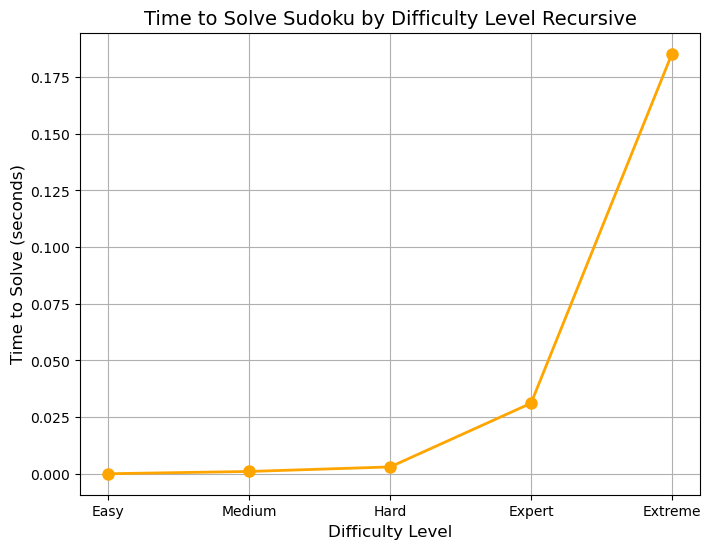

In [41]:
import matplotlib.pyplot as plt

levels = ["Easy", "Medium", "Hard", "Expert", "Extreme"]
time_to_solve = [
    time_easy,  # Easy
    time_medium,  # Medium
    time_hard,  # Hard
    time_expert,  # Expert
    time_extreme   # Extreme
]

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(levels, time_to_solve, marker='o', color='orange', linestyle='-', linewidth=2, markersize=8, label='Recursive')
plt.title("Time to Solve Sudoku by Difficulty Level Recursive", fontsize=14)
plt.xlabel("Difficulty Level", fontsize=12)
plt.ylabel("Time to Solve (seconds)", fontsize=12)
plt.grid(True)
plt.show()

<h3>1. Hasil Analisis:</h3>

Fungsi Basis
Jika tidak ada sel kosong yang tersisa (𝑘 = 0):

<h4>𝑇(0) = 𝑂(1)</h4>

Ini berarti penyelesaian selesai tanpa operasi tambahan.

Fungsi Rekurens:

Pada setiap langkah, algoritma mencoba hingga 9 kemungkinan angka untuk satu sel kosong, memvalidasi angka tersebut, dan kemudian melanjutkan rekursi untuk 𝑘 − 1 sel kosong.

Maka:
<h4>𝑇(𝑘) = 9 ⋅ 𝑇(𝑘 − 1) + 𝑂(1)</h4>

<h3>2. Penyelesaian Rekurens:</h3>

Gunakan metode substitusi untuk menyelesaikan rekurens:

<h4>𝑇(𝑘) = 9 ⋅ 𝑇(𝑘 − 1) + 𝑂(1)</h4>

Substitusi rekursif hingga mencapai fungsi basis:

<h4>𝑇(𝑘) = 9 ⋅ (9 ⋅ 𝑇(𝑘 − 2) + 𝑂(1)) + 𝑂(1)</h4>

<h4>𝑇(𝑘) = 9^2 ⋅ 𝑇(𝑘 − 2) + 9 ⋅ 𝑂(1) + 𝑂(1)</h4>

Lanjutkan hingga 𝑇(0) = 𝑂(1):

<h4>𝑇(𝑘) = 9^𝑘 ⋅ 𝑇(0) + (9^𝑘 − 1 + 9^𝑘 − 2 + ⋯ + 9^0) ⋅ 𝑂(1)</h4>

Karena 
𝑇(0) = 𝑂(1), dan penjumlahan 9^𝑘 − 1 + ⋯ + 9^0 adalah deret geometrik:

<h4>𝑇(𝑘)= 𝑂(9^𝑘) + 𝑂(9^𝑘−1 / 8)</h4>

<h3>3. Analisis Berdasarkan Level Kesulitan:</h3>

Jika k adalah jumlah sel kosong (berkaitan dengan tingkat kesulitan):

<h4>Easy(𝑘∼35): 𝑇(𝑘)=𝑂(9^35)</h4>

<h4>Medium(𝑘∼45): 𝑇(𝑘)=𝑂(9^45)</h4>

<h4>Hard(𝑘∼55): 𝑇(𝑘)=𝑂(9^55)</h4>

<h4>Expert(𝑘∼60): 𝑇(𝑘)=𝑂(9^60)</h4>

<h4>Extreme(𝑘∼64): 𝑇(𝑘)=𝑂(9^64)</h4>

Didapatkan bahwa kompleksitas waktu yang didapatkan adalah 

<h4>T(k) = 𝑂(9^𝑘)</h4>
 
 Kompleksitas 𝑂(9^𝑘) adalah eksponensial, sehingga algoritma ini masuk dalam kelas efisiensi yang sangat tidak efisien (eksponensial).

### Iterative

In [24]:
steps = 0

def is_valid(board, row, col, num):
    block_row, block_col = 3 * (row // 3), 3 * (col // 3)
    return (
        num not in board[row] and
        num not in [board[i][col] for i in range(9)] and
        num not in [board[i][j] for i in range(block_row, block_row + 3) for j in range(block_col, block_col + 3)]
    )


def solve_sudoku(board):
    global steps
    empty_cells = [(r, c) for r in range(9) for c in range(9) if board[r][c] == 0]

    def backtrack(index=0):
        global steps
        if index == len(empty_cells): 
            return True
        row, col = empty_cells[index]
        for num in range(1, 10):
            steps += 1
            if is_valid(board, row, col, num):
                board[row][col] = num
                if backtrack(index + 1):
                    return True
                board[row][col] = 0
        return False

    return backtrack()


def generate_sudoku(level):
    board = [[0 for _ in range(9)] for _ in range(9)]

    for i in range(0, 9, 3):
        fill_subgrid(board, i, i)
    solve_sudoku(board)  
   
    if level == "easy":
        remove_numbers(board, random.randint(30, 35))
    elif level == "medium":
        remove_numbers(board, random.randint(36, 45))
    elif level == "hard":
        remove_numbers(board, random.randint(46, 55))
    elif level == "expert":
        remove_numbers(board, random.randint(56, 60))
    elif level == "extreme":
        remove_numbers(board, random.randint(61, 64))
    return board


def fill_subgrid(board, row, col):
    nums = random.sample(range(1, 10), 9)
    for i in range(3):
        for j in range(3):
            board[row + i][col + j] = nums.pop()


def remove_numbers(board, count):
    while count > 0:
        row, col = random.randint(0, 8), random.randint(0, 8)
        if board[row][col] != 0:
            board[row][col] = 0
            count -= 1


def print_board(board):
    for i, row in enumerate(board):
        if i % 3 == 0 and i != 0:
            print("-" * 21)
        for j, num in enumerate(row):
            if j % 3 == 0 and j != 0:
                print("| ", end="")
            print(str(num) if num != 0 else ".", end=" ")
        print()


if __name__ == "__main__":
    levels = ["easy", "medium", "hard", "expert", "extreme"]
    time_to_solve_list = []

    for level in levels:
        print(f"\n=== Sudoku Level: {level.capitalize()} ===")
        # Generate Sudoku puzzle
        start_generate = time.time()
        sudoku = generate_sudoku(level)
        end_generate = time.time()

        print(f"\nGenerated Sudoku Puzzle ({level.capitalize()}):")
        print_board(sudoku)
        print(f"\nTime to generate Sudoku: {end_generate - start_generate:.6f} seconds")

        global steps
        steps = 0
        start_solve = time.time()
        solve_sudoku(sudoku)
        end_solve = time.time()

        time_to_solve = end_solve - start_solve
        time_to_solve_list.append(time_to_solve)

        print("\nSolved Sudoku:")
        print_board(sudoku)
        print(f"\nTime to solve Sudoku: {time_to_solve:.6f} seconds")
        print(f"Steps taken to solve Sudoku: {steps}")



=== Sudoku Level: Easy ===

Generated Sudoku Puzzle (Easy):
. 8 2 | . . . | 5 . 7 
. . . | 2 . . | . 8 6 
7 5 . | . . . | . . 4 
---------------------
5 4 . | . . 9 | . 7 2 
. 7 9 | . 5 2 | 4 6 . 
2 3 8 | . 4 7 | . 5 . 
---------------------
. 1 4 | . 9 6 | 3 2 5 
3 2 . | 5 8 1 | 6 . 9 
. 6 5 | . 2 3 | 7 . 8 

Time to generate Sudoku: 0.002998 seconds

Solved Sudoku:
6 8 2 | 1 3 4 | 5 9 7 
4 9 3 | 2 7 5 | 1 8 6 
7 5 1 | 9 6 8 | 2 3 4 
---------------------
5 4 6 | 3 1 9 | 8 7 2 
1 7 9 | 8 5 2 | 4 6 3 
2 3 8 | 6 4 7 | 9 5 1 
---------------------
8 1 4 | 7 9 6 | 3 2 5 
3 2 7 | 5 8 1 | 6 4 9 
9 6 5 | 4 2 3 | 7 1 8 

Time to solve Sudoku: 0.003997 seconds
Steps taken to solve Sudoku: 1301

=== Sudoku Level: Medium ===

Generated Sudoku Puzzle (Medium):
8 5 2 | . 1 4 | . . 9 
. . 1 | . . . | . 3 8 
6 . 3 | 7 . 8 | . 5 1 
---------------------
. 3 . | 8 . 7 | 1 9 4 
1 . 4 | . . 9 | 7 6 3 
7 . 9 | . . . | 8 . . 
---------------------
4 1 . | . . . | . 8 7 
. . 7 | 6 8 . | 3 4 2 
. . 8 | . 7

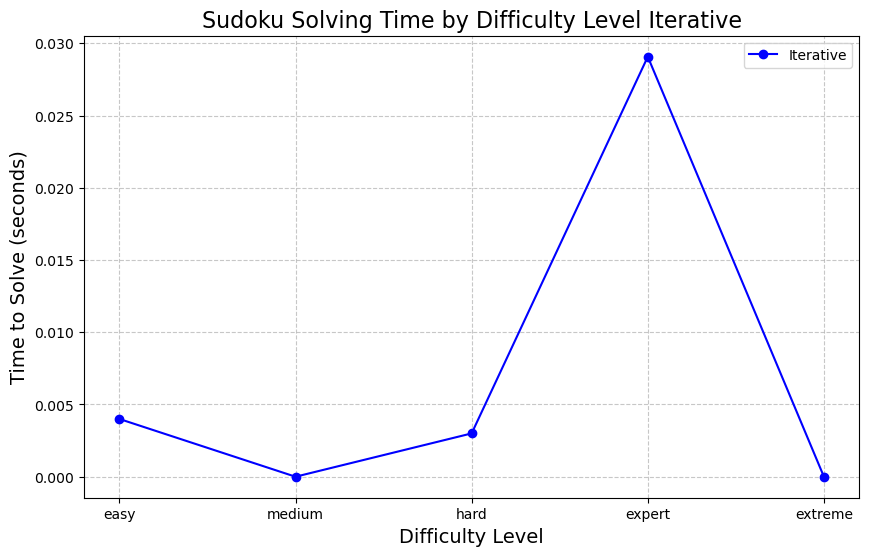

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(levels, time_to_solve_list, marker='o', linestyle='-', color='blue', label='Iterative')
plt.xlabel("Difficulty Level", fontsize=14)
plt.ylabel("Time to Solve (seconds)", fontsize=14)
plt.title("Sudoku Solving Time by Difficulty Level Iterative", fontsize=16)
plt.grid(linestyle="--", alpha=0.7)
plt.legend()
plt.show()

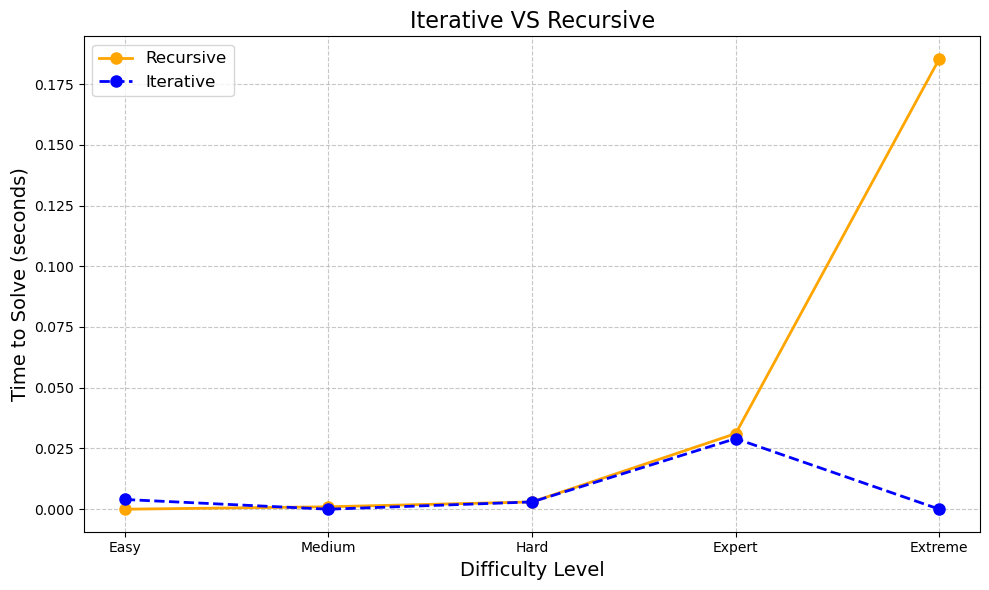

In [43]:
import matplotlib.pyplot as plt

levels = ["Easy", "Medium", "Hard", "Expert", "Extreme"]
time_to_solve = [time_easy, time_medium, time_hard, time_expert, time_extreme]  # Recursive times
time_to_solve_list =  time_to_solve_list # Iterative times


plt.figure(figsize=(10, 6))
plt.plot(levels, time_to_solve, marker='o', color='orange', linestyle='-', linewidth=2, markersize=8, label='Recursive')
plt.plot(levels, time_to_solve_list, marker='o', color='blue', linestyle='--', linewidth=2, markersize=8, label='Iterative')
plt.title("Iterative VS Recursive", fontsize=16)
plt.xlabel("Difficulty Level", fontsize=14)
plt.ylabel("Time to Solve (seconds)", fontsize=14)
plt.grid(linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
